# Inference using Variable Elimination Method

In [1]:
import numpy as np
from IPython.display import Image

## Student Model

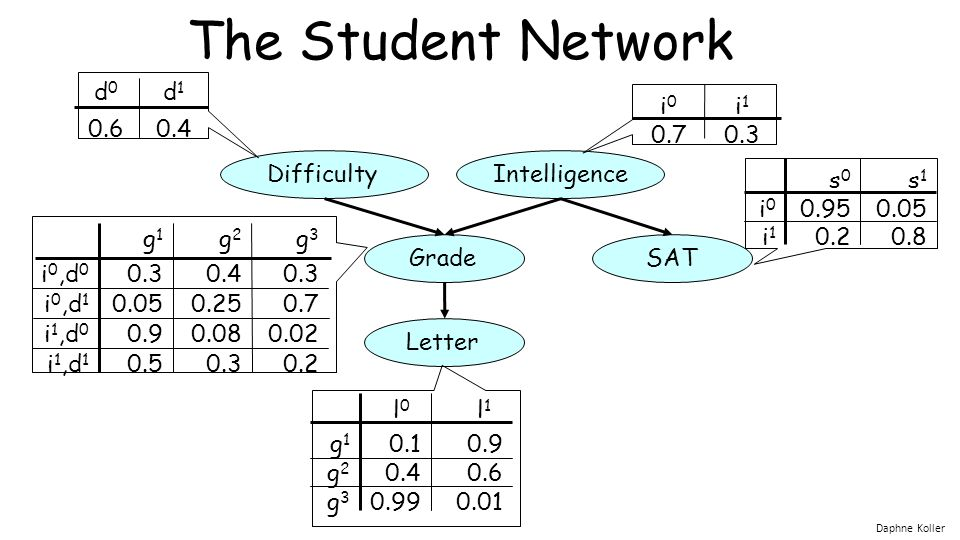

In [2]:
Image('studentModel.png', width = 660, height = 240)

## Given the model above, lets define the Bayesian Network

### Random Variables

In [3]:
bn = np.array(['diff', 'intel','grade', 'sat','letter'])

### Probability Distribution for Independent Variables

In [4]:
cpd_diff = np.array([[0.6,0.4]])
cpd_intel = np.array([[0.7,0.3]])

In [5]:
print(cpd_diff.shape)
print(cpd_intel.shape)

(1, 2)
(1, 2)


### Conditional Probability Distribution for Independent Variables

In [6]:
cpd_sat = np.array([[0.95,0.05],[0.2,0.8]])
cpd_grade = np.array([[0.3,0.4,0.3],[0.05,0.25,0.7],[0.9,0.08,0.02],[0.5,0.3,0.2]])
cpd_letter = np.array([[0.1,0.9],[0.4,0.6],[0.99,0.01]])

In [7]:
print(cpd_sat.shape)
print(cpd_grade.shape)
print(cpd_letter.shape)

(2, 2)
(4, 3)
(3, 2)


### Independent Variables' Factors

$diff$ and $intel$ are independet variables, so their factors are their own Probability Distribution

In [8]:
f_diff = cpd_diff
f_intel = cpd_intel

In [9]:
print("Difficulty factor: ")
print(f_diff)

Difficulty factor: 
[[0.6 0.4]]


In [10]:
print("Intelligence factor: ")
print(f_intel)

Intelligence factor: 
[[0.7 0.3]]


### Dependent Variables' Factors

#### SAT factor

$sat$ factor is as follow

\begin{equation*}
f(s) = \sum_{i}p(i) * p (s|i)\\
\end{equation*}

In [11]:
f_sat = np.dot(f_intel,cpd_sat)

In [12]:
print("SAT factor: ")
print(f_sat)

SAT factor: 
[[0.725 0.275]]


#### Grade factor

Taking the elimination order {$d,i$}, $grade$ factor is as follow

\begin{equation*}
f(g,i) = \sum_{d}p(d) * p (g|d,i)\\
f(g) = \sum_{i} p(i) * f(g,i)\\
\end{equation*}

In the process, we will get a new factor $f(g,i)$

In [13]:
f_g_i0 = np.dot(f_diff,cpd_grade[:2])
f_g_i1 = np.dot(f_diff,cpd_grade[2:])
f_g_i = np.concatenate((f_g_i0,f_g_i1),axis=0)

In [14]:
print("New factor f(g,i): ")
print(f_g_i)

New factor f(g,i): 
[[0.2   0.34  0.46 ]
 [0.74  0.168 0.092]]


In [15]:
f_grade = np.dot(f_intel,f_g_i)

In [16]:
print("Grade factor: ")
print(f_grade)

Grade factor: 
[[0.362  0.2884 0.3496]]


#### Letter factor

Taking the elimination order {$d,i,g$}, $letter$ factor is as follow

\begin{equation*}
f(g,i) = \sum_{d}p(d) * p (g|d,i)\\
f(g) = \sum_{i}p(i) * f(g,i)\\
f(l) = \sum_{g}p(l|g) * f(g)\\
\end{equation*}

In [17]:
f_letter = np.dot(f_grade,cpd_letter)

In [18]:
print("Letter factor: ")
print(f_letter)

Letter factor: 
[[0.497664 0.502336]]


## Using SamIam 

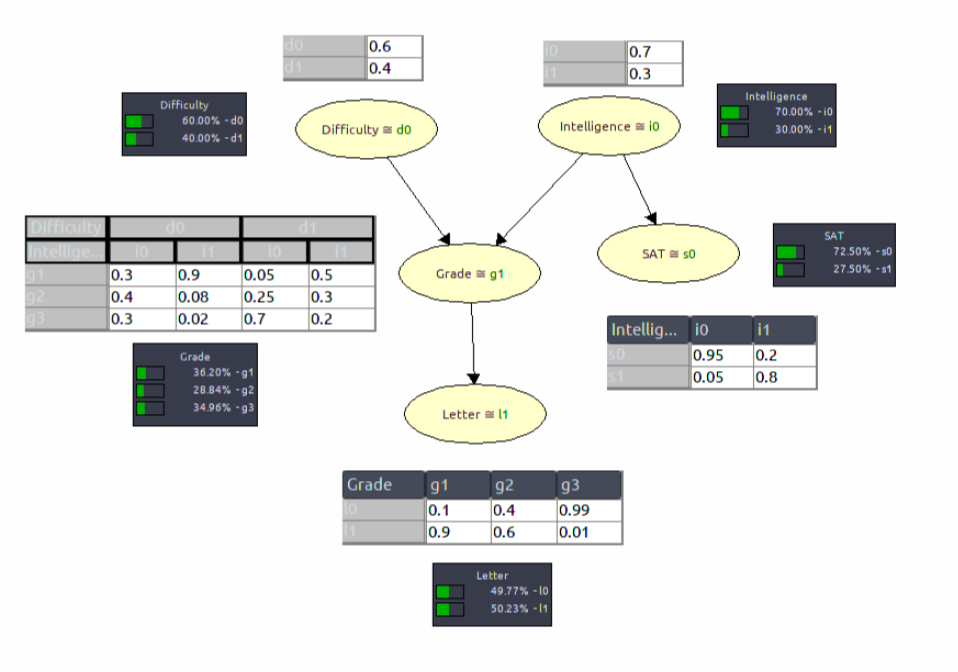

In [19]:
Image('SamIam.png', width = 958, height = 672)

## References

https://ermongroup.github.io/cs228-notes/inference/ve/

https://courses.cs.washington.edu/courses/cse473/11au/slides/cse473au11-bn-inference.pdf